<a href="https://colab.research.google.com/github/mahak-dev/Assignmentswebsite/blob/main/Combined_Stockandsentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 2.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
df1 = pd.read_csv('bitcoindata_modified.csv')
df2 = pd.read_csv('BTC-USD.csv')

In [ ]:
df1.head()

,Date,combined_news,Subjectivity,Polarity,compound,negative,neutral,positive
0,08-07-2020,Animoca Brands achieves record growth in reve...,0.481818,0.375758,0.8225,0.000,0.815,0.185
1,08-07-2020,Energy company EDP Renewables confirms April ...,0.850000,0.000000,-0.6808,0.179,0.731,0.090
2,08-07-2020,A blockchain project builds a layer of securit...,0.290000,0.110000,0.7096,0.000,0.879,0.121
3,08-07-2020,Bitcoin Will Never Be Truly Private Says Andre...,0.458333,0.000000,0.2016,0.036,0.890,0.074
4,08-07-2020,Pennsylvania man admits to defrauding West Vir...,0.458333,-0.208333,0.2023,0.058,0.849,0.092


In [ ]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,08-07-2020,9253.020508,9450.335938,9249.500000,9428.333008,9428.333008,19702359883
1,07-07-2020,9349.161133,9360.617188,9201.815430,9252.277344,9252.277344,13839652595
2,06-07-2020,9072.849609,9375.474609,9058.664063,9375.474609,9375.474609,17889263252
3,05-07-2020,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143
4,04-07-2020,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515


In [ ]:
df1.shape

(688, 8)

In [ ]:
df2.shape

(52, 7)

In [ ]:
merge = df1.merge(df2, how='inner', on='Date')

In [ ]:
merge.shape

(688, 14)

In [ ]:
merge

,Date,combined_news,Subjectivity,Polarity,compound,negative,neutral,positive,Open,High,Low,Close,Adj Close,Volume
0,08-07-2020,Animoca Brands achieves record growth in reve...,0.481818,0.375758,0.8225,0.000,0.815,0.185,9253.020508,9450.335938,9249.500000,9428.333008,9428.333008,19702359883
1,08-07-2020,Energy company EDP Renewables confirms April ...,0.850000,0.000000,-0.6808,0.179,0.731,0.090,9253.020508,9450.335938,9249.500000,9428.333008,9428.333008,19702359883
2,08-07-2020,A blockchain project builds a layer of securit...,0.290000,0.110000,0.7096,0.000,0.879,0.121,9253.020508,9450.335938,9249.500000,9428.333008,9428.333008,19702359883
3,08-07-2020,Bitcoin Will Never Be Truly Private Says Andre...,0.458333,0.000000,0.2016,0.036,0.890,0.074,9253.020508,9450.335938,9249.500000,9428.333008,9428.333008,19702359883
4,08-07-2020,Pennsylvania man admits to defrauding West Vir...,0.458333,-0.208333,0.2023,0.058,0.849,0.092,9253.020508,9450.335938,9249.500000,9428.333008,9428.333008,19702359883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,20-05-2020,Major $800 Million Bitcoin And Crypto Investor...,0.266667,0.354167,0.8176,0.000,0.821,0.179,9725.329102,9804.793945,9447.201172,9522.981445,9522.981445,36546239703
684,19-05-2020,"Bitcoin Is Right Where Oil Was In 1890"" The t...",0.339286,0.089286,0.0000,0.000,1.000,0.000,9727.063477,9836.047852,9539.624023,9729.038086,9729.038086,39254288955
685,19-05-2020,"Bitcoin Is ""Right Where Oil Was In 1890"" One ...",0.233929,0.133929,0.0000,0.000,1.000,0.000,9727.063477,9836.047852,9539.624023,9729.038086,9729.038086,39254288955
686,18-05-2020,"Bitcoin Price Prediction: After Touching $9,17...",0.300000,0.187500,0.4404,0.000,0.923,0.077,9675.695313,9906.030273,9570.359375,9726.575195,9726.575195,41827139896


In [ ]:
score = merge["compound"].values
Sentiment = []
for i in score:
  if i >= 0.05:
    Sentiment.append(1)
  elif i <= -0.05:
    Sentiment.append(0)
  else:
    Sentiment.append(0)
merge["Label"] = Sentiment
merge.head()

,Date,combined_news,Subjectivity,Polarity,compound,negative,neutral,positive,Open,High,Low,Close,Adj Close,Volume,Label
0,08-07-2020,Animoca Brands achieves record growth in reve...,0.481818,0.375758,0.8225,0.000,0.815,0.185,9253.020508,9450.335938,9249.5,9428.333008,9428.333008,19702359883,1
1,08-07-2020,Energy company EDP Renewables confirms April ...,0.850000,0.000000,-0.6808,0.179,0.731,0.090,9253.020508,9450.335938,9249.5,9428.333008,9428.333008,19702359883,0
2,08-07-2020,A blockchain project builds a layer of securit...,0.290000,0.110000,0.7096,0.000,0.879,0.121,9253.020508,9450.335938,9249.5,9428.333008,9428.333008,19702359883,1
3,08-07-2020,Bitcoin Will Never Be Truly Private Says Andre...,0.458333,0.000000,0.2016,0.036,0.890,0.074,9253.020508,9450.335938,9249.5,9428.333008,9428.333008,19702359883,1
4,08-07-2020,Pennsylvania man admits to defrauding West Vir...,0.458333,-0.208333,0.2023,0.058,0.849,0.092,9253.020508,9450.335938,9249.5,9428.333008,9428.333008,19702359883,1


In [ ]:
keep_columns = ['Open','High','Low','Close','Volume','Subjectivity','Polarity','compound','negative','neutral','positive','Label']

In [ ]:
df = merge[keep_columns]
df

,Open,High,Low,Close,Volume,Subjectivity,Polarity,compound,negative,neutral,positive,Label
0,9253.020508,9450.335938,9249.500000,9428.333008,19702359883,0.481818,0.375758,0.8225,0.000,0.815,0.185,1
1,9253.020508,9450.335938,9249.500000,9428.333008,19702359883,0.850000,0.000000,-0.6808,0.179,0.731,0.090,0
2,9253.020508,9450.335938,9249.500000,9428.333008,19702359883,0.290000,0.110000,0.7096,0.000,0.879,0.121,1
3,9253.020508,9450.335938,9249.500000,9428.333008,19702359883,0.458333,0.000000,0.2016,0.036,0.890,0.074,1
4,9253.020508,9450.335938,9249.500000,9428.333008,19702359883,0.458333,-0.208333,0.2023,0.058,0.849,0.092,1
...,...,...,...,...,...,...,...,...,...,...,...,...
683,9725.329102,9804.793945,9447.201172,9522.981445,36546239703,0.266667,0.354167,0.8176,0.000,0.821,0.179,1
684,9727.063477,9836.047852,9539.624023,9729.038086,39254288955,0.339286,0.089286,0.0000,0.000,1.000,0.000,0
685,9727.063477,9836.047852,9539.624023,9729.038086,39254288955,0.233929,0.133929,0.0000,0.000,1.000,0.000,0
686,9675.695313,9906.030273,9570.359375,9726.575195,41827139896,0.300000,0.187500,0.4404,0.000,0.923,0.077,1


In [ ]:
X = df
X = np.array(X.drop(['Label'],1))

y = np.array(merge['Label'])

<ipython-input-48-90cb10a12c52>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(X.drop(['Label'],1))


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
model = LinearDiscriminantAnalysis().fit(x_train, y_train)

In [ ]:
predictions = model.predict(x_test)
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1])

In [ ]:
y_test

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        69
           1       1.00      0.90      0.95        69

    accuracy                           0.95       138
   macro avg       0.95      0.95      0.95       138
weighted avg       0.95      0.95      0.95       138



In [ ]:
print(accuracy_score(y_test, predictions))

0.9492753623188406


In [ ]:
import matplotlib.pyplot as plt

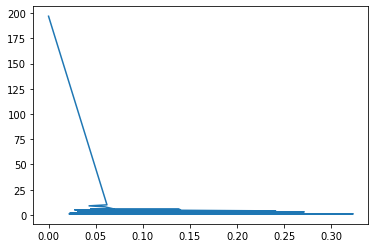

In [ ]:
df['positive'].value_counts().plot()
plt.show()

In [ ]:
df[['Polarity']].describe()

,Polarity
count,688.000000
mean,0.089334
std,0.173471
min,-0.500000
25%,0.000000
50%,0.062500
75%,0.180455
max,0.900000


<AxesSubplot:title={'center':'Polarity'}, xlabel='Date', ylabel='mean Polarity'>

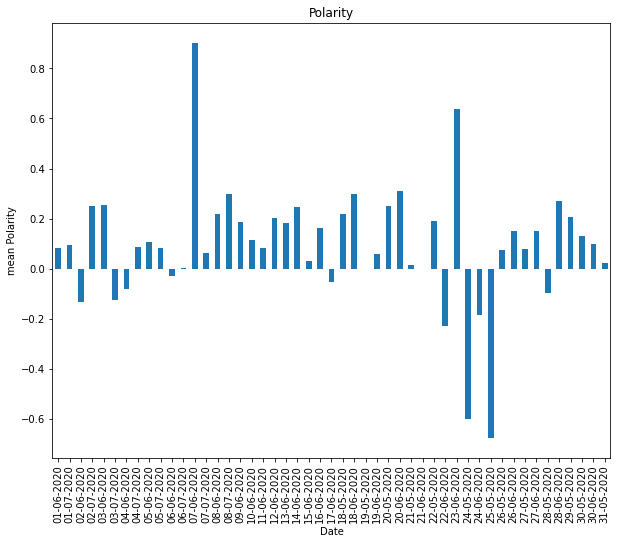

In [ ]:
dfg = merge.groupby(['Date'])['compound'].mean()
dfg.plot(kind='bar',title='Polarity', ylabel='mean Polarity', xlabel='Date',figsize=(10,8),)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

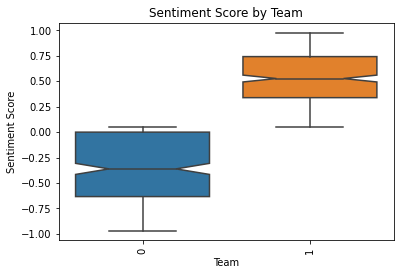

In [ ]:
import seaborn as sns
#create seaborn boxplots by group
sns.boxplot(x='Label', y='compound', notch = True,
            data=df, showfliers=False).set(title='Sentiment Score by Team')
#modify axis labels
plt.xlabel('Team')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)